# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии методом наименьших квадратов по видам:
1. линейная, $y=w_1 x + w_0$ - расчёт коэффициентов реализовать саммому
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту

# Импорт библиотек

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Чтение датасета

In [32]:
filepath = "..\\datasets\\students_simple.csv"
data = pd.read_csv(filepath)

In [33]:
N = 22
index_1 = N % 5  
index_2 = (N ** 2) % 5 + 5

index_1, index_2

(2, 9)

In [34]:
my_data = data.iloc[:, [index_1, index_2]]

In [35]:
my_data.head(20)

,income,test_time
0,430,8.5
1,640,6.2
2,610,6.8
3,330,12.0
4,420,7.5
5,290,10.0
6,480,7.2
7,610,4.2
8,840,3.5
9,330,9.5


In [36]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     20 non-null     int64  
 1   test_time  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes


# Рассчёт корреляции

In [37]:
def correlation_fechner(x, y):
    x_median = np.median(x)
    y_median = np.median(y)
    
    # Определяем знаки отклонений от медианы
    sign_x = np.sign(x - x_median)
    sign_y = np.sign(y - y_median)
    
    # Считаем совпадения и несовпадения знаков
    n_a = np.sum((sign_x * sign_y) > 0)  # Совпадающие знаки
    n_b = np.sum((sign_x * sign_y) < 0)  # Несовпадающие знаки
    
    
    # Формула Фехнера
    k_fechner = (n_a - n_b) / (n_a + n_b)
    
    return k_fechner, n_a, n_b


def correlation_pearson_with_ci(x, y, alpha=0.05):
    n = len(x)
    
    # Коэффициент Пирсона
    pearson_corr = stats.pearsonr(x, y)
    r_pearson, p_value = pearson_corr
    ci_lib = pearson_corr.confidence_interval()
    
    # Доверительный интервал методом Фишера
    # Z-преобразование Фишера
    z = np.arctanh(r_pearson)
    
    # Стандартная ошибка для Z
    se_z = 1 / np.sqrt(n - 3)
    
    # Критическое значение для заданного alpha
    z_crit = stats.norm.ppf(1 - alpha/2)
    
    # Доверительный интервал для Z
    z_lower = z - z_crit * se_z
    z_upper = z + z_crit * se_z
    
    # Обратное преобразование для получения ДИ для r
    ci_lower = np.tanh(z_lower)
    ci_upper = np.tanh(z_upper)
    
    return r_pearson, p_value, (ci_lower, ci_upper), ci_lib


def correlation_spearman(x, y):
    r_spearman, p_value = stats.spearmanr(x, y)
    
    return r_spearman, p_value


def correlation_kendall(x, y):
    tau, p_value = stats.kendalltau(x, y)
    
    return tau, p_value


def analyze_correlations(data, var1='income', var2='test_time'):

    x = data[var1].values
    y = data[var2].values
    
    
    # 1. Коэффициент Фехнера
    print("\n1. КОЭФФИЦИЕНТ ФЕХНЕРА (корреляция знаков)")
    print("-" * 70)
    k_f, n_a, n_b = correlation_fechner(x, y)
    print(f"   Коэффициент Фехнера: {k_f:.4f}")
    print(f"   Совпадающих знаков: {n_a}")
    print(f"   Несовпадающих знаков: {n_b}")
    
    # 2. Коэффициент Пирсона
    print("\n2. КОЭФФИЦИЕНТ ПИРСОНА (линейная корреляция)")
    print("-" * 70)
    r_p, p_p, (ci_low, ci_up), ci = correlation_pearson_with_ci(x, y)
    print(f"   Коэффициент Пирсона: r = {r_p:.4f}")
    print(f"   p-value: {p_p:.4f}")
    print(f"   95% доверительный интервал: [{ci_low:.4f}, {ci_up:.4f}]")
    print(f"   95% библиотечный доверительный интервал: [{ci.low:.4f}, {ci.high:.4f}]")
    
    # 3. Коэффициент Спирмена
    print("\n3. КОЭФФИЦИЕНТ СПИРМЕНА (ранговая корреляция)")
    print("-" * 70)
    r_s, p_s = correlation_spearman(x, y)
    print(f"   Коэффициент Спирмена: ρ = {r_s:.4f}")
    print(f"   p-value: {p_s:.4f}")
    
    # 4. Коэффициент Кенделла
    print("\n4. КОЭФФИЦИЕНТ КЕНДЕЛЛА (тау)")
    print("-" * 70)
    tau, p_k = correlation_kendall(x, y)
    print(f"   Коэффициент Кенделла: τ = {tau:.4f}")
    print(f"   p-value: {p_k:.4f}")
    
    
    return {
        'fechner': {'coefficient': k_f, 'n_agree': n_a, 'n_disagree': n_b},
        'pearson': {'coefficient': r_p, 'p_value': p_p, 'ci': (ci_low, ci_up)},
        'spearman': {'coefficient': r_s, 'p_value': p_s},
        'kendall': {'coefficient': tau, 'p_value': p_k}
    }


# Выполняем анализ
results = analyze_correlations(my_data, 'income', 'test_time')
    



1. КОЭФФИЦИЕНТ ФЕХНЕРА (корреляция знаков)
----------------------------------------------------------------------
   Коэффициент Фехнера: -0.4444
   Совпадающих знаков: 5
   Несовпадающих знаков: 13

2. КОЭФФИЦИЕНТ ПИРСОНА (линейная корреляция)
----------------------------------------------------------------------
   Коэффициент Пирсона: r = -0.5699
   p-value: 0.0087
   95% доверительный интервал: [-0.8085, -0.1703]
   95% библиотечный доверительный интервал: [-0.8085, -0.1703]

3. КОЭФФИЦИЕНТ СПИРМЕНА (ранговая корреляция)
----------------------------------------------------------------------
   Коэффициент Спирмена: ρ = -0.5392
   p-value: 0.0142

4. КОЭФФИЦИЕНТ КЕНДЕЛЛА (тау)
----------------------------------------------------------------------
   Коэффициент Кенделла: τ = -0.4362
   p-value: 0.0077


Анализ коррелляций, все коэффициенты показывают умеренное значение отрицательной корелляции

# Визуализация: гистограммы и scatter plot для income и test_time

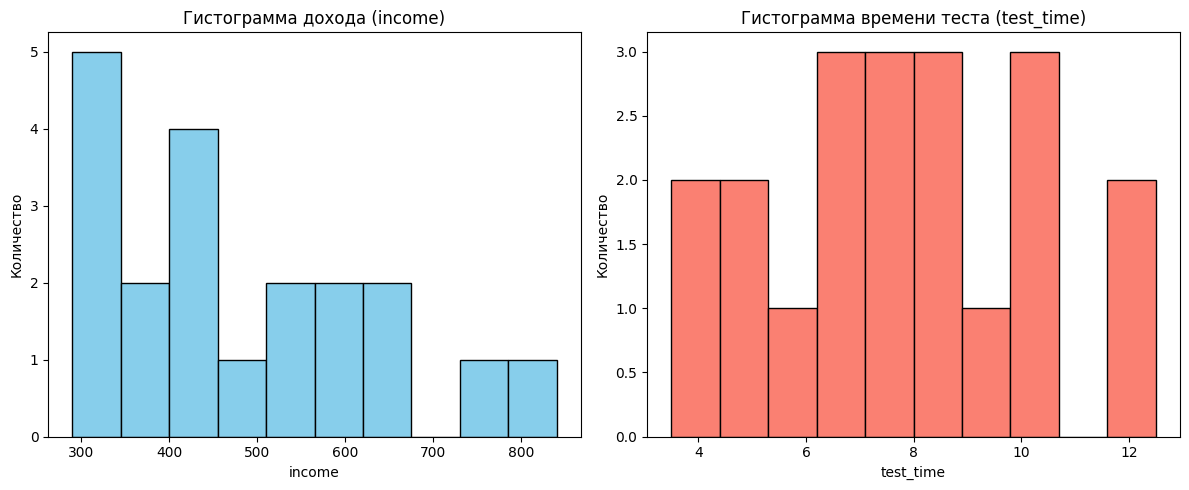

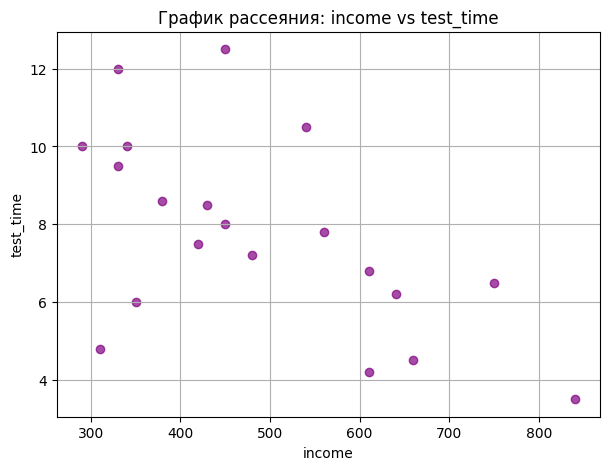

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма income
axes[0].hist(my_data['income'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма дохода (income)')
axes[0].set_xlabel('income')
axes[0].set_ylabel('Количество')

# Гистограмма test_time
axes[1].hist(my_data['test_time'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Гистограмма времени теста (test_time)')
axes[1].set_xlabel('test_time')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(my_data['income'], my_data['test_time'], color='purple', alpha=0.7)
plt.title('График рассеяния: income vs test_time')
plt.xlabel('income')
plt.ylabel('test_time')
plt.grid(True)
plt.show()

График рассеивания показывает, что при увеличения дохода время в тесте снижается, но есть достатончо точек несоответствующих этому тренду, гистограммы показывают что распределение дохода скошено влево

# 3. Уравнения регрессии: линейная, квадратичная, гиперболическая, показательная

In [39]:
# Линейная регрессия: y = w1*x + w0
x = my_data['income'].astype(float)
y = my_data['test_time'].astype(float)

# Линейная (ручной расчет коэффициентов)
w1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
w0 = y.mean() - w1 * x.mean()
y_pred_linear = w1 * x + w0
print(f'Линейная: y = {w1:.4f}*x + {w0:.4f}')

# Квадратичная регрессия: y = w2*x^2 + w1*x + w0
coeffs_quad = np.polyfit(x, y, 2)
y_pred_quad = coeffs_quad[0]*x**2 + coeffs_quad[1]*x + coeffs_quad[2]
print(f'Квадратичная: y = {coeffs_quad[0]:.4f}*x^2 + {coeffs_quad[1]:.4f}*x + {coeffs_quad[2]:.4f}')

# Гиперболическая регрессия: y = w1/x + w0
X_hyper = 1/x
A = np.vstack([X_hyper, np.ones(len(X_hyper))]).T
w1_hyper, w0_hyper = np.linalg.lstsq(A, y, rcond=None)[0]
y_pred_hyper = w1_hyper / x + w0_hyper
print(f'Гиперболическая: y = {w1_hyper:.4f}/x + {w0_hyper:.4f}')

# Показательная регрессия: y = w1^x * w0
# Логарифмируем y для линейной аппроксимации
y_log = np.log(y)
A_exp = np.vstack([x, np.ones(len(x))]).T
w1_exp, w0_exp = np.linalg.lstsq(A_exp, y_log, rcond=None)[0]
y_pred_exp = np.exp(w0_exp) * np.exp(w1_exp * x)
print(f'Показательная: y = exp({w1_exp:.4f}*x + {w0_exp:.4f})')


Линейная: y = -0.0092*x + 12.2089
Квадратичная: y = -0.0000*x^2 + 0.0097*x + 7.6017
Гиперболическая: y = 1832.3465/x + 3.6149
Показательная: y = exp(-0.0013*x + 2.6477)


In [40]:
# метрики в таблице
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Линейная': y_pred_linear,
    'Квадратичная': y_pred_quad,
    'Гиперболическая': y_pred_hyper,
    'Показательная': y_pred_exp
}


metrics = []
for name, y_pred in models.items():
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    metrics.append({'Модель': name, 'MSE': mse, 'R2': r2})
metrics_df = pd.DataFrame(metrics)
print('Сравнение метрик регрессий:')
print(metrics_df)

Сравнение метрик регрессий:
            Модель       MSE        R2
0         Линейная  4.083128  0.324779
1     Квадратичная  3.905364  0.354176
2  Гиперболическая  4.579035  0.242772
3    Показательная  4.305486  0.288008


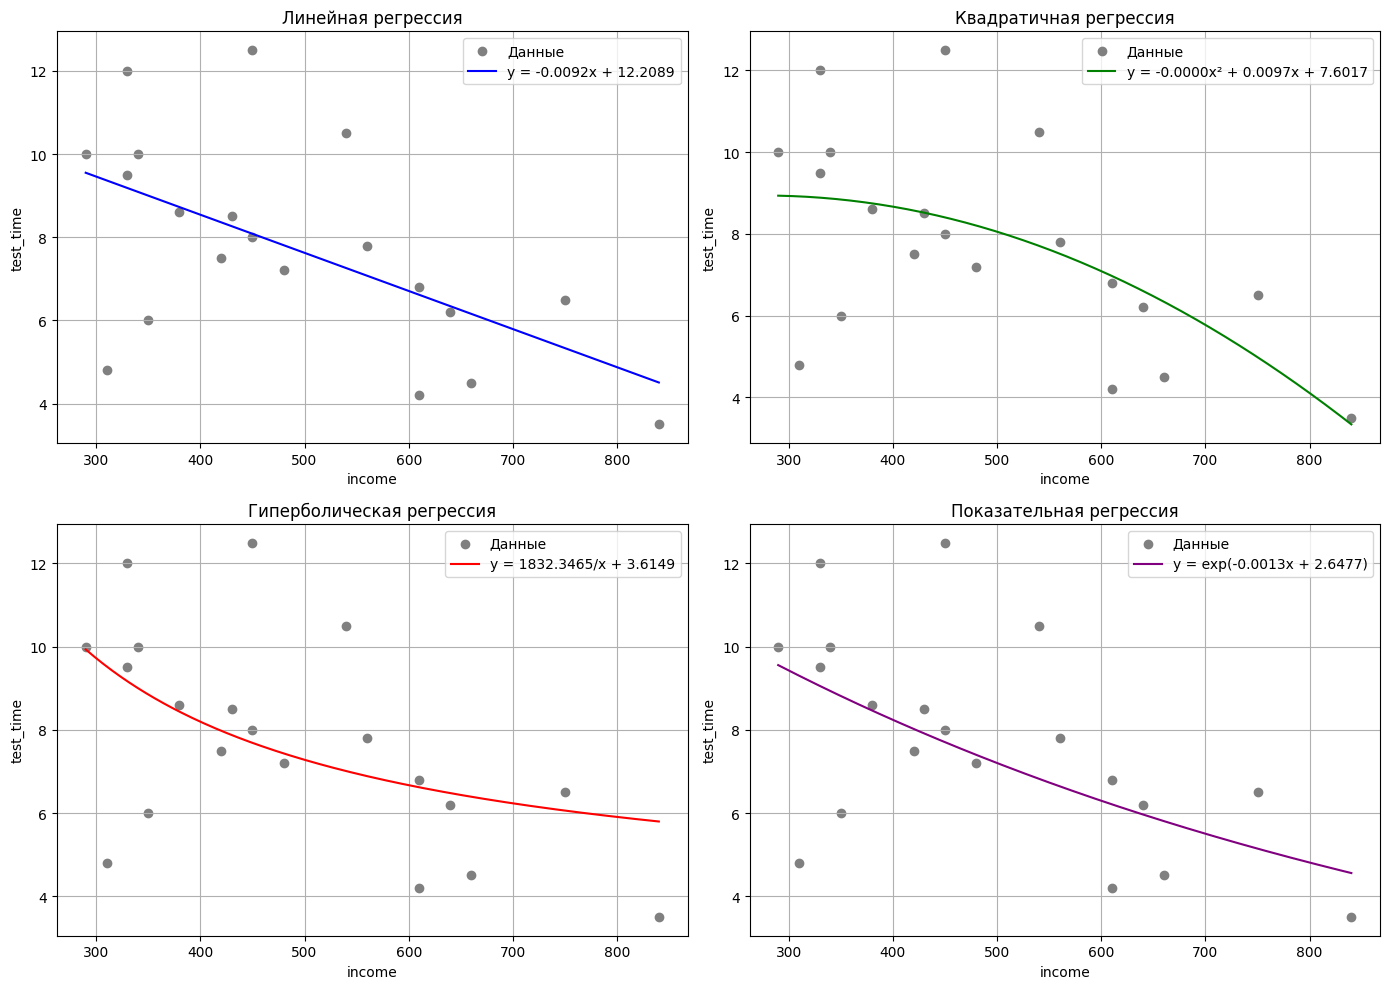

In [41]:
x_dense = np.linspace(x.min(), x.max(), 200)

# Линейная
y_dense_linear = w1 * x_dense + w0
# Квадратичная
y_dense_quad = coeffs_quad[0]*x_dense**2 + coeffs_quad[1]*x_dense + coeffs_quad[2]
# Гиперболическая
y_dense_hyper = w1_hyper / x_dense + w0_hyper
# Показательная
y_dense_exp = np.exp(w0_exp) * np.exp(w1_exp * x_dense)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Линейная
axes[0].scatter(x, y, label='Данные', color='gray')
axes[0].plot(x_dense, y_dense_linear, label=f'y = {w1:.4f}x + {w0:.4f}', color='blue')
axes[0].set_title('Линейная регрессия')
axes[0].set_xlabel('income')
axes[0].set_ylabel('test_time')
axes[0].legend()
axes[0].grid(True)

# Квадратичная
axes[1].scatter(x, y, label='Данные', color='gray')
axes[1].plot(x_dense, y_dense_quad, label=f'y = {coeffs_quad[0]:.4f}x² + {coeffs_quad[1]:.4f}x + {coeffs_quad[2]:.4f}', color='green')
axes[1].set_title('Квадратичная регрессия')
axes[1].set_xlabel('income')
axes[1].set_ylabel('test_time')
axes[1].legend()
axes[1].grid(True)

# Гиперболическая
axes[2].scatter(x, y, label='Данные', color='gray')
axes[2].plot(x_dense, y_dense_hyper, label=f'y = {w1_hyper:.4f}/x + {w0_hyper:.4f}', color='red')
axes[2].set_title('Гиперболическая регрессия')
axes[2].set_xlabel('income')
axes[2].set_ylabel('test_time')
axes[2].legend()
axes[2].grid(True)

# Показательная
axes[3].scatter(x, y, label='Данные', color='gray')
axes[3].plot(x_dense, y_dense_exp, label=f'y = exp({w1_exp:.4f}x + {w0_exp:.4f})', color='purple')
axes[3].set_title('Показательная регрессия')
axes[3].set_xlabel('income')
axes[3].set_ylabel('test_time')
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()

In [43]:
# Проверка уравнений регрессии с помощью критерия Фишера
from scipy.stats import f

# Вычисление суммы квадратов отклонений
def calculate_sse(y, y_pred):
    return np.sum((y - y_pred)**2)

# Вычисление критерия Фишера
def fisher_test(y, y_pred, k):
    n = len(y)
    sse = calculate_sse(y, y_pred)
    ssr = np.sum((y_pred - y.mean())**2)
    mse_model = ssr / (k - 1)
    mse_residual = sse / (n - k)
    f_stat = mse_model / mse_residual
    p_value = 1 - f.cdf(f_stat, dfn=(k - 1), dfd=(n - k))
    return f_stat, p_value

# Проверка для гиперболической и квадратичной моделей
results_fisher = []
for name, y_pred in models.items():
    if name in ['Квадратичная', 'Гиперболическая']:
        k = 2 if name != 'Квадратичная' else 3  # Количество параметров модели
        f_stat, p_value = fisher_test(y, y_pred, k)
        results_fisher.append({'Модель': name, 'F-статистика': f_stat, 'p-value': p_value})

# Вывод результатов
fisher_df = pd.DataFrame(results_fisher)
print('Результаты проверки с помощью критерия Фишера:')
print(fisher_df)

Результаты проверки с помощью критерия Фишера:
            Модель  F-статистика   p-value
0     Квадратичная      4.661474  0.024320
1  Гиперболическая      5.770903  0.027299


In [ ]:
Обе моддели значимые, лучше всего  аппроксимирует квадратичная регрессия